In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 

# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std

# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def split_train_data(data, predictive_label, apply_smote = True):

    X = data.drop("conformity_class", axis=1)
    y = data[predictive_label]
    
    if apply_smote:
        # SMOTE
        smote = SMOTE(random_state=32)
        X, y = smote.fit_resample(X, y)


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=999
    )
    
    return X_train, X_test, y_train, y_test
    
def model_report_performance(X, y):
    # define the model
    model = ExtraTreesClassifier()
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
   
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
def get_confusion_matrix(y_test, y_pred, classifier):
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    color = 'white'
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

In [3]:
predictive_label = "conformity_class"

In [4]:
# Visualize the proportion of borrowers
load_data = pd.read_csv("data\synthetic_conformity_data.csv")

load_data["conformity_class"] = np.where(
    load_data["conformity_class"] == "conforming", 1, 0
)

In [5]:
X_train, X_test, y_train, y_test = split_train_data(load_data, predictive_label, apply_smote = True)

model_report_performance(X_train, y_train)

# fit the model on the whole dataset
classifier = ExtraTreesClassifier()
classifier.fit(X_train.values, y_train.values)

Accuracy: 0.950 (0.029)


ExtraTreesClassifier()

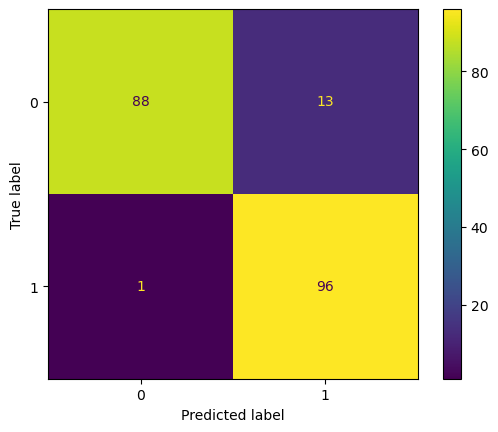

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       101
           1       0.88      0.99      0.93        97

    accuracy                           0.93       198
   macro avg       0.93      0.93      0.93       198
weighted avg       0.94      0.93      0.93       198



In [6]:
# test model
y_pred  = classifier.predict(X_test.values)

# confusion_matrix
get_confusion_matrix(y_test, y_pred, classifier)
print(classification_report(y_test, y_pred))

In [7]:
# Save the model to disk
filename = 'model\water_quality_classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [8]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9292929292929293


C:\Users\Karol\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


In [23]:
row = [[443, 0.03, 0.01, 0.2, 38.07, 458.51, 4000]]
yhat = loaded_model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [28]:
row = [[450, 0.025, 0.01, 0.15, 35, 458.51, 4000]]
yhat = loaded_model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1
